#  Unemployment Analysis with Python
#### Analyze unemployment rate data representing unemployed people percentage. 
#### ● Use Python for data cleaning, exploration, and visualization of unemployment trends. 
#### ● Investigate the impact of Covid-19 on unemployment rates. 
#### ● Identify key patterns or seasonal trends in the data. 
#### ● Present insights that could inform economic or social policies. 

Dataset no 1:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
************************************************
Dataset no 2:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   

C:\Users\mwaqa\AppData\Local\Temp\ipykernel_9100\480686604.py:14: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


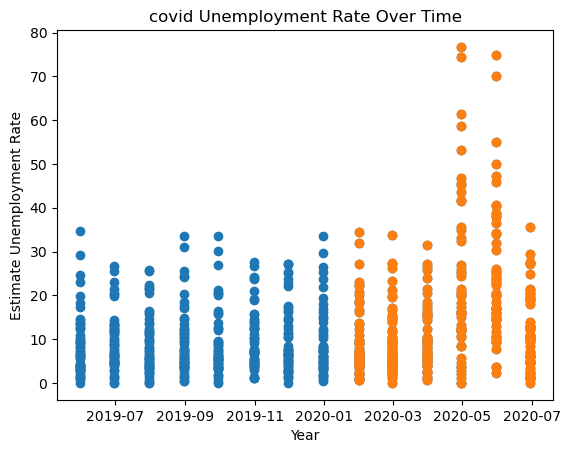

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# Loading datasets
df = pd.read_csv('Unemployment in India.csv')
df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
print('Dataset no 1:')
print(df.head(4))
print('************************************************')
print('Dataset no 2:')
print(df2.head(4))
# first we have to find a coloumn through which we can distribute our data 
# so for that we have to sort the date coloumn but first we have to convert in date time formate
df[' Date'] = pd.to_datetime(df[' Date'])

# sorting by date
print('************************************************')
print('Sorted dataset on the base of Date: ')
print(df.sort_values(' Date'))

# counting null values
print('************************************************')
print('Checking null :')
print(df.isnull().sum())

# dropping NaN
print('************************************************')
print('Droping NaN values :')
print(df.dropna(inplace = True))

# overview of the data
print('************************************************')
print('Dataset information :')
print(df.info())

# mathimatical overview of data
print('************************************************')
print("\nStatistical Summary:")
print(df.describe())

# ploting some graphs 
print('************************************************')
plt.figure()
plt.scatter(df[' Date'],df[' Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimate Unemployment Rate')

# Analysis from the COVID-19 era
covid_start = "2020-1-1"
covid_end = "2020-12-30"

covid_df = df[(df[' Date'] >= covid_start) & (df[' Date'] <= covid_end)]

pre_covid = df[df[' Date'] == covid_start]

# drawing graphs on the covid data
plt.scatter(covid_df[' Date'],covid_df[' Estimated Unemployment Rate (%)'])
plt.title('covid Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Estimate Unemployment Rate')
print('************************************************')


print('from the graphs we just draw it is clear that in India the rate of unemployment rate is heigher in the covid era')
print('it is about 80% in the covid era which is too much for a country like this.')

# Sales Prediction using Python 
#### Predict future sales based on factors like advertising spend, target segment and platform. 
#### ● Prepare data through cleaning, transformation and feature selection. 
#### ● Use regression or time series models to forecast sales. 
#### ● Analyze how changes in advertising impact sales outcomes. 
#### ● Deliver actionable insights for business marketing strategies.

First 5 rows of dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Missing values in dataset:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Statistical Summary:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200

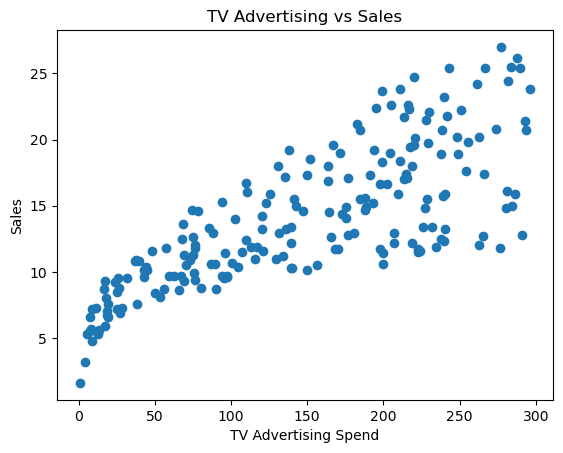


Predicted Future Sales:
19.575606431481972


In [3]:

# Sales Prediction using Python
# Advertising Dataset

#. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#. Load the dataset
data = pd.read_csv("Advertising.csv")

# Display first 5 rows
print("First 5 rows of dataset:")
print(data.head())

#. Data Cleaning
print("\nMissing values in dataset:")
print(data.isnull().sum())

# Remove missing values if any
data = data.dropna()

#. Dataset information
print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

#. Feature Selection
# Independent variables (advertising spend)
X = data[['TV', 'Radio', 'Newspaper']]

# Dependent variable (sales)
y = data['Sales']

#. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#. Apply Linear Regression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

#. Predict sales
y_pred = model.predict(X_test)

# Compare actual and predicted sales
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})

print("\nActual vs Predicted Sales:")
print(comparison.head())

#. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

#. Analyze advertising impact
impact = pd.DataFrame({
    'Advertising Medium': X.columns,
    'Impact on Sales': model.coef_
})

print("\nImpact of Advertising on Sales:")
print(impact)

#. Visualization
plt.scatter(data['TV'], data['Sales'])
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales")
plt.show()

#. Predict Future Sales
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [30]
})

future_sales = model.predict(new_data)

print("\nPredicted Future Sales:")
print(future_sales[0])
